In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_csv('SolarPrediction.csv')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [3]:


# Rename 'Data' column to 'DateTime' for clarity
df = df.rename(columns={'Data': 'DateTime'})

# Convert DateTime to pandas datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Convert Time column to datetime.time objects for better handling
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Similarly, convert sunrise and sunset times
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.time
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.time

# Sort by DateTime to ensure proper plotting
df = df.sort_values('DateTime')
df

,UNIXTime,DateTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7223,1472793006,2016-09-01,19:10:06,2.53,55,30.45,65,155.71,3.37,06:07:00,18:38:00
7257,1472781308,2016-09-01,15:55:08,628.80,63,30.42,58,1.55,6.75,06:07:00,18:38:00
7256,1472781606,2016-09-01,16:00:06,596.57,62,30.42,56,81.70,5.62,06:07:00,18:38:00
7255,1472781907,2016-09-01,16:05:07,577.10,62,30.42,57,53.61,7.87,06:07:00,18:38:00
7254,1472782211,2016-09-01,16:10:11,573.13,62,30.42,58,14.04,3.37,06:07:00,18:38:00
...,...,...,...,...,...,...,...,...,...,...,...
24714,1483206901,2016-12-31,07:55:01,39.30,43,30.31,86,262.51,5.62,06:57:00,17:54:00
24715,1483206602,2016-12-31,07:50:02,39.51,42,30.31,85,265.53,7.87,06:57:00,17:54:00
24716,1483206302,2016-12-31,07:45:02,52.87,42,30.31,84,240.48,4.50,06:57:00,17:54:00
24664,1483221902,2016-12-31,12:05:02,378.41,53,30.33,68,321.95,10.12,06:57:00,17:54:00


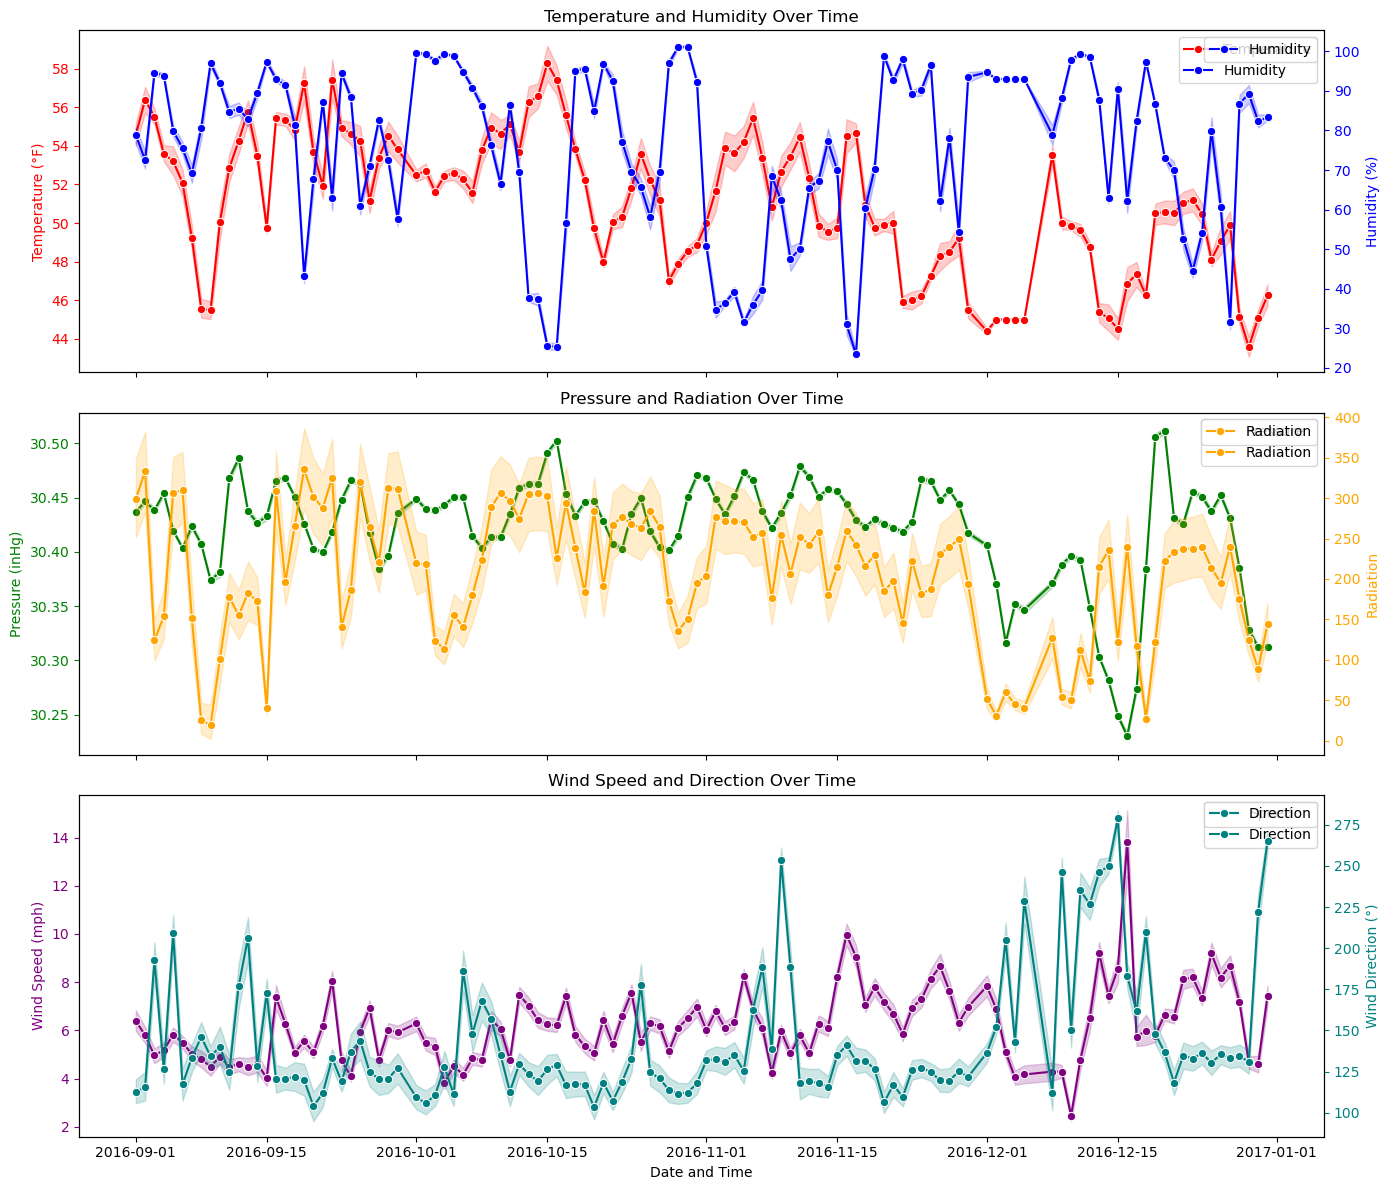

In [4]:

# Alternative visualization: Create a combined plot for related measurements
# Create a figure for related measurements (grouped by type)
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Temperature and Humidity - often related
ax1 = axes[0]
ax1.set_title('Temperature and Humidity Over Time')
ax1_twin = ax1.twinx()  # Create a twin axis for Humidity

# Plot Temperature on left axis
sns.lineplot(x='DateTime', y='Temperature', data=df, marker='o', color='red', label='Temperature', ax=ax1)
ax1.set_ylabel('Temperature (°F)', color='red')
ax1.tick_params(axis='y', colors='red')

# Plot Humidity on right axis
sns.lineplot(x='DateTime', y='Humidity', data=df, marker='o', color='blue', label='Humidity', ax=ax1_twin)
ax1_twin.set_ylabel('Humidity (%)', color='blue')
ax1_twin.tick_params(axis='y', colors='blue')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Pressure and Radiation
ax2 = axes[1]
ax2.set_title('Pressure and Radiation Over Time')
ax2_twin = ax2.twinx()  # Create a twin axis for Radiation

# Plot Pressure on left axis
sns.lineplot(x='DateTime', y='Pressure', data=df, marker='o', color='green', label='Pressure', ax=ax2)
ax2.set_ylabel('Pressure (inHg)', color='green')
ax2.tick_params(axis='y', colors='green')

# Plot Radiation on right axis
sns.lineplot(x='DateTime', y='Radiation', data=df, marker='o', color='orange', label='Radiation', ax=ax2_twin)
ax2_twin.set_ylabel('Radiation', color='orange')
ax2_twin.tick_params(axis='y', colors='orange')

# Add legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Wind Speed and Direction
ax3 = axes[2]
ax3.set_title('Wind Speed and Direction Over Time')
ax3_twin = ax3.twinx()  # Create a twin axis for Direction

# Plot Speed on left axis
sns.lineplot(x='DateTime', y='Speed', data=df, marker='o', color='purple', label='Speed', ax=ax3)
ax3.set_ylabel('Wind Speed (mph)', color='purple')
ax3.tick_params(axis='y', colors='purple')

# Plot Direction on right axis
sns.lineplot(x='DateTime', y='WindDirection(Degrees)', data=df, marker='o', color='teal', 
             label='Direction', ax=ax3_twin)
ax3_twin.set_ylabel('Wind Direction (°)', color='teal')
ax3_twin.tick_params(axis='y', colors='teal')

# Add legend
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Format the x-axis with appropriate date formatting for all subplots
plt.xticks(rotation=45)
ax3.set_xlabel('Date and Time')
plt.tight_layout()

plt.show()




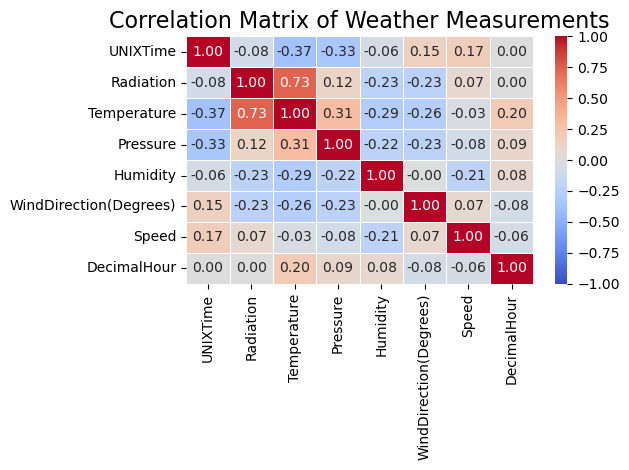

In [5]:
#plot correletions

df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.minute
# Create a decimal hour (hour + minute/60) for better correlation
df['DecimalHour'] = df['Hour'] + df['Minute']/60

# Select only numeric columns for correlation analysis
numeric_columns = ['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 
                   'Humidity', 'WindDirection(Degrees)', 'Speed', 
                   'DecimalHour']
corr_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# 1. Create a correlation heatmap
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Weather Measurements', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## LSTM NN

In [17]:
import lstm
import data_prep

target_col = 'Radiation'  # Column to predict


X_train, X_val, X_test, y_train, y_val, y_test, scalers, feature_cols, transform_info = data_prep.prepare_weather_data(
        df,     
        target_col='Radiation',  
        window_size=24,
        feature_selection_mode='basic',  # Start with basic features
        standardize_features=False,  # Try StandardScaler
        use_solar_elevation=True,  # Try the solar elevation feature
        use_piecewise_transform=False,  # Start without piecewise transform
        log_transform=True, #figured out this one is super important
        #min_target_threshold=1.2
)


Adding solar elevation proxy feature
SolarElevation created for 32686 rows, 100.0% of data
Added 'Radiation_is_low' feature (threshold: 1.2000)
Added SolarElevation to features
Log-transformed Radiation -> Radiation_log
Using MinMaxScaler for feature scaling
X_train shape: (19596, 24, 17)
y_train shape: (19596, 1)
X_val shape: (6533, 24, 17)
y_val shape: (6533, 1)
X_test shape: (6533, 24, 17)
y_test shape: (6533, 1)
Features used: ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeMinutesSin', 'TimeMinutesCos', 'Radiation_is_low', 'SolarElevation', 'SunriseMinutes', 'SunsetMinutes', 'DaylightMinutes', 'TimeSinceSunrise', 'TimeUntilSunset', 'DaylightPosition', 'HourOfDay']


In [7]:
transform_info

{'transforms': [{'applied': True,
   'type': 'log',
   'epsilon': 1e-06,
   'original_col': 'Radiation'}],
 'target_col_original': 'Radiation',
 'target_col_transformed': 'Radiation_log'}

In [10]:
import optuna
import torch
import itertools
from sklearn.metrics import r2_score
device = torch.device('cpu')
def objective(trial):
    # Define hyperparameter space
    hidden_dim = trial.suggest_categorical('hidden_dim', [64, 128, 256])
    num_layers = trial.suggest_int('num_layers', 1, 3)
    dropout_prob = trial.suggest_float('dropout_prob', 0.1, 0.3, step=0.1)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-3, log=True)
    clip_grad_norm = trial.suggest_categorical('clip_grad_norm', [1.0, 1.5])
    value_multiplier = trial.suggest_categorical('value_multiplier', [0.1, 0.15, 0.2])
    
    # Create model with trial parameters
    model = lstm.WeatherLSTM(
        input_dim=len(feature_cols),
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        output_dim=1,
        dropout_prob=dropout_prob
    )
    
    # Train model
    model.fit(
        X_train, y_train, X_val, y_val,
        epochs=5,  # Just 5 epochs for initial screening
        batch_size=32,
        learning_rate=learning_rate,  # Use the suggested learning rate
        scheduler_type="plateau",
        loss_type="value_aware",
        mse_weight=0.7,
        mape_weight=0.3,
        value_multiplier=value_multiplier,  # Use the suggested value multiplier
        clip_grad_norm=clip_grad_norm  # Use the suggested clip gradient norm
    )
    
    # Evaluate model
    model.eval()
    with torch.no_grad():
        predictions = model(torch.tensor(X_val, dtype=torch.float32).to(device))
        predictions = predictions.cpu().numpy()
    
    # Calculate metrics
    r2 = r2_score(y_val, predictions)
    print(f"Trial {trial.number}: hidden_dim={hidden_dim}, num_layers={num_layers}, "
          f"dropout_prob={dropout_prob}, learning_rate={learning_rate:.6f}, "
          f"clip_grad_norm={clip_grad_norm}, value_multiplier={value_multiplier}, R²={r2:.4f}")
    
    return r2  # Return metric to maximize

# Assuming these variables are defined elsewhere in your code:
# feature_cols, X_train, y_train, X_val, y_val, device, LSTMModel

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Get best parameters
best_params = study.best_params
print(f"Best parameters: {best_params}")
print(f"Best value (R²): {study.best_value:.4f}")

[I 2025-04-15 15:14:18,563] A new study created in memory with name: no-name-ffe0346d-48d3-438f-b0c7-2bdf0a856888


X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.2)
Regularization settings:
- Dropout probability: 0.3
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.5
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.177221 - Val loss: 0.108534 - Val RMSE: 0.127556 - Val R²: 0.882090 - Val MAPE: 4.85%
Epoch 2/5 - Train loss: 0.085207 - Val loss: 0.061299 - Val RMSE: 0.067685 - Val R²: 0.966801 - Val MAPE: 2.18%
Epoch 3/5 - Train loss: 0.080535 - Val loss: 0.062078 - Val RMSE: 0.071597 - Val R²: 0.962852 - Val MAPE: 2.26%
Epoch 4/5 - Train loss: 0.078892 - Val loss: 0.062107 - Val RMSE: 0.064327 - Val R²: 0.970013 - Val MAPE: 1.96%
Epoch 5/5 - Train loss: 0.078944 - Val loss: 0.061723 - Val RMSE: 0.060594 - Val R²: 0.973392 - Val MAPE: 1.96%
Training complete. Best model saved.


[I 2025-04-15 15:16:02,869] Trial 0 finished with value: 0.9733919282591174 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'dropout_prob': 0.3, 'learning_rate': 0.0009349495910508144, 'clip_grad_norm': 1.5, 'value_multiplier': 0.2}. Best is trial 0 with value: 0.9733919282591174.


Trial 0: hidden_dim=256, num_layers=2, dropout_prob=0.3, learning_rate=0.000935, clip_grad_norm=1.5, value_multiplier=0.2, R²=0.9734
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.15)
Regularization settings:
- Dropout probability: 0.3
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.0
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.159981 - Val loss: 0.069669 - Val RMSE: 0.087253 - Val R²: 0.944829 - Val MAPE: 3.03%
Epoch 2/5 - Train loss: 0.088018 - Val loss: 0.073242 - Val RMSE: 0.075738 - Val R²: 0.958431 - Val MAPE: 2.57%
Epoch 3/5 - Train loss: 0.080332 - Val loss: 0.064999 - Val RMSE: 0.079111 - Val R²: 0.954645 - Val MAPE: 2.46%
Epoch 4/5 - Train loss: 0.077120 - Val loss: 0.069693 - Val RMSE: 0.075160 - Val R²: 0.959063 - Val MAPE: 2.44%
Epoch 5/5 - Train loss: 0.075373 - Val loss: 0.057693 - Val

[I 2025-04-15 15:18:47,080] Trial 1 finished with value: 0.9713044946209858 and parameters: {'hidden_dim': 256, 'num_layers': 3, 'dropout_prob': 0.3, 'learning_rate': 0.00042902895595054726, 'clip_grad_norm': 1.0, 'value_multiplier': 0.15}. Best is trial 0 with value: 0.9733919282591174.


Trial 1: hidden_dim=256, num_layers=3, dropout_prob=0.3, learning_rate=0.000429, clip_grad_norm=1.0, value_multiplier=0.15, R²=0.9713
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.15)
Regularization settings:
- Dropout probability: 0.1
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.5
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.345724 - Val loss: 0.104144 - Val RMSE: 0.107525 - Val R²: 0.916215 - Val MAPE: 3.56%
Epoch 2/5 - Train loss: 0.133536 - Val loss: 0.070972 - Val RMSE: 0.100097 - Val R²: 0.927391 - Val MAPE: 3.09%
Epoch 3/5 - Train loss: 0.107539 - Val loss: 0.082141 - Val RMSE: 0.078612 - Val R²: 0.955215 - Val MAPE: 2.40%
Epoch 4/5 - Train loss: 0.091228 - Val loss: 0.068057 - Val RMSE: 0.080385 - Val R²: 0.953173 - Val MAPE: 2.78%
Epoch 5/5 - Train loss: 0.084435 - Val loss: 0.059245 - Va

[I 2025-04-15 15:19:13,303] Trial 2 finished with value: 0.9611845549546276 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'dropout_prob': 0.1, 'learning_rate': 0.00013286141186223023, 'clip_grad_norm': 1.5, 'value_multiplier': 0.15}. Best is trial 0 with value: 0.9733919282591174.


Trial 2: hidden_dim=128, num_layers=1, dropout_prob=0.1, learning_rate=0.000133, clip_grad_norm=1.5, value_multiplier=0.15, R²=0.9612
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.1)
Regularization settings:
- Dropout probability: 0.3
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.5
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.296287 - Val loss: 0.074583 - Val RMSE: 0.097398 - Val R²: 0.931254 - Val MAPE: 3.05%
Epoch 2/5 - Train loss: 0.111954 - Val loss: 0.064752 - Val RMSE: 0.086224 - Val R²: 0.946123 - Val MAPE: 2.60%
Epoch 3/5 - Train loss: 0.095463 - Val loss: 0.084372 - Val RMSE: 0.075213 - Val R²: 0.959005 - Val MAPE: 2.58%
Epoch 4/5 - Train loss: 0.091155 - Val loss: 0.074418 - Val RMSE: 0.074510 - Val R²: 0.959768 - Val MAPE: 2.36%
Epoch 5/5 - Train loss: 0.087257 - Val loss: 0.065205 - Val

[I 2025-04-15 15:20:03,561] Trial 3 finished with value: 0.9615354694000139 and parameters: {'hidden_dim': 128, 'num_layers': 2, 'dropout_prob': 0.3, 'learning_rate': 0.00032293078373499365, 'clip_grad_norm': 1.5, 'value_multiplier': 0.1}. Best is trial 0 with value: 0.9733919282591174.


Trial 3: hidden_dim=128, num_layers=2, dropout_prob=0.3, learning_rate=0.000323, clip_grad_norm=1.5, value_multiplier=0.1, R²=0.9615
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.2)
Regularization settings:
- Dropout probability: 0.3
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.0
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.426395 - Val loss: 0.103288 - Val RMSE: 0.151113 - Val R²: 0.834517 - Val MAPE: 5.20%
Epoch 2/5 - Train loss: 0.154639 - Val loss: 0.081785 - Val RMSE: 0.116390 - Val R²: 0.901829 - Val MAPE: 3.71%
Epoch 3/5 - Train loss: 0.120220 - Val loss: 0.069040 - Val RMSE: 0.100139 - Val R²: 0.927329 - Val MAPE: 3.18%
Epoch 4/5 - Train loss: 0.105830 - Val loss: 0.080040 - Val RMSE: 0.112772 - Val R²: 0.907837 - Val MAPE: 3.99%
Epoch 5/5 - Train loss: 0.101030 - Val loss: 0.066389 - Val 

[I 2025-04-15 15:21:16,918] Trial 4 finished with value: 0.9473862576128074 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'dropout_prob': 0.3, 'learning_rate': 0.00012285356826923025, 'clip_grad_norm': 1.0, 'value_multiplier': 0.2}. Best is trial 0 with value: 0.9733919282591174.


Trial 4: hidden_dim=128, num_layers=3, dropout_prob=0.3, learning_rate=0.000123, clip_grad_norm=1.0, value_multiplier=0.2, R²=0.9474
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.1)
Regularization settings:
- Dropout probability: 0.2
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.5
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.512705 - Val loss: 0.181440 - Val RMSE: 0.104436 - Val R²: 0.920959 - Val MAPE: 4.11%
Epoch 2/5 - Train loss: 0.206253 - Val loss: 0.122531 - Val RMSE: 0.087359 - Val R²: 0.944695 - Val MAPE: 3.14%
Epoch 3/5 - Train loss: 0.161425 - Val loss: 0.108721 - Val RMSE: 0.094416 - Val R²: 0.935399 - Val MAPE: 3.54%
Epoch 4/5 - Train loss: 0.133722 - Val loss: 0.093718 - Val RMSE: 0.078323 - Val R²: 0.955545 - Val MAPE: 2.58%
Epoch 5/5 - Train loss: 0.116783 - Val loss: 0.089584 - Val 

[I 2025-04-15 15:21:43,347] Trial 5 finished with value: 0.9550144412050021 and parameters: {'hidden_dim': 64, 'num_layers': 2, 'dropout_prob': 0.2, 'learning_rate': 0.00017949035535074463, 'clip_grad_norm': 1.5, 'value_multiplier': 0.1}. Best is trial 0 with value: 0.9733919282591174.


Trial 5: hidden_dim=64, num_layers=2, dropout_prob=0.2, learning_rate=0.000179, clip_grad_norm=1.5, value_multiplier=0.1, R²=0.9550
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.2)
Regularization settings:
- Dropout probability: 0.3
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.5
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.436101 - Val loss: 0.108790 - Val RMSE: 0.148306 - Val R²: 0.840607 - Val MAPE: 5.09%
Epoch 2/5 - Train loss: 0.137723 - Val loss: 0.084408 - Val RMSE: 0.095749 - Val R²: 0.933562 - Val MAPE: 3.13%
Epoch 3/5 - Train loss: 0.119473 - Val loss: 0.079984 - Val RMSE: 0.093435 - Val R²: 0.936734 - Val MAPE: 3.16%
Epoch 4/5 - Train loss: 0.114621 - Val loss: 0.111518 - Val RMSE: 0.083175 - Val R²: 0.949866 - Val MAPE: 2.73%
Epoch 5/5 - Train loss: 0.110682 - Val loss: 0.085468 - Val R

[I 2025-04-15 15:22:22,942] Trial 6 finished with value: 0.9426459941012411 and parameters: {'hidden_dim': 64, 'num_layers': 3, 'dropout_prob': 0.3, 'learning_rate': 0.0001741179454334383, 'clip_grad_norm': 1.5, 'value_multiplier': 0.2}. Best is trial 0 with value: 0.9733919282591174.


Trial 6: hidden_dim=64, num_layers=3, dropout_prob=0.3, learning_rate=0.000174, clip_grad_norm=1.5, value_multiplier=0.2, R²=0.9426
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.2)
Regularization settings:
- Dropout probability: 0.2
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.5
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.322566 - Val loss: 0.072004 - Val RMSE: 0.101125 - Val R²: 0.925891 - Val MAPE: 3.56%
Epoch 2/5 - Train loss: 0.119299 - Val loss: 0.110680 - Val RMSE: 0.128193 - Val R²: 0.880910 - Val MAPE: 4.77%
Epoch 3/5 - Train loss: 0.093269 - Val loss: 0.066965 - Val RMSE: 0.083367 - Val R²: 0.949633 - Val MAPE: 2.52%
Epoch 4/5 - Train loss: 0.079216 - Val loss: 0.063175 - Val RMSE: 0.075094 - Val R²: 0.959134 - Val MAPE: 2.25%
Epoch 5/5 - Train loss: 0.074111 - Val loss: 0.064434 - Val R

[I 2025-04-15 15:23:35,872] Trial 7 finished with value: 0.9629928433601169 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'dropout_prob': 0.2, 'learning_rate': 0.0002853988507353253, 'clip_grad_norm': 1.5, 'value_multiplier': 0.2}. Best is trial 0 with value: 0.9733919282591174.


Trial 7: hidden_dim=128, num_layers=3, dropout_prob=0.2, learning_rate=0.000285, clip_grad_norm=1.5, value_multiplier=0.2, R²=0.9630
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.2)
Regularization settings:
- Dropout probability: 0.3
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.5
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.326361 - Val loss: 0.087435 - Val RMSE: 0.125102 - Val R²: 0.886583 - Val MAPE: 4.03%
Epoch 2/5 - Train loss: 0.103775 - Val loss: 0.080311 - Val RMSE: 0.096154 - Val R²: 0.932998 - Val MAPE: 3.37%
Epoch 3/5 - Train loss: 0.094023 - Val loss: 0.070338 - Val RMSE: 0.068897 - Val R²: 0.965601 - Val MAPE: 2.42%
Epoch 4/5 - Train loss: 0.090716 - Val loss: 0.073039 - Val RMSE: 0.073600 - Val R²: 0.960744 - Val MAPE: 2.33%
Epoch 5/5 - Train loss: 0.088660 - Val loss: 0.069564 - Val 

[I 2025-04-15 15:24:49,989] Trial 8 finished with value: 0.9635586228929895 and parameters: {'hidden_dim': 128, 'num_layers': 3, 'dropout_prob': 0.3, 'learning_rate': 0.0008704539836338982, 'clip_grad_norm': 1.5, 'value_multiplier': 0.2}. Best is trial 0 with value: 0.9733919282591174.


Trial 8: hidden_dim=128, num_layers=3, dropout_prob=0.3, learning_rate=0.000870, clip_grad_norm=1.5, value_multiplier=0.2, R²=0.9636
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.15)
Regularization settings:
- Dropout probability: 0.3
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.5
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.320683 - Val loss: 0.082079 - Val RMSE: 0.095708 - Val R²: 0.933619 - Val MAPE: 3.00%
Epoch 2/5 - Train loss: 0.109313 - Val loss: 0.074510 - Val RMSE: 0.090321 - Val R²: 0.940880 - Val MAPE: 2.73%
Epoch 3/5 - Train loss: 0.097760 - Val loss: 0.067699 - Val RMSE: 0.082993 - Val R²: 0.950085 - Val MAPE: 2.57%
Epoch 4/5 - Train loss: 0.093934 - Val loss: 0.073660 - Val RMSE: 0.083403 - Val R²: 0.949590 - Val MAPE: 2.69%
Epoch 5/5 - Train loss: 0.089079 - Val loss: 0.066660 - Val

[I 2025-04-15 15:25:15,120] Trial 9 finished with value: 0.9649199960117535 and parameters: {'hidden_dim': 128, 'num_layers': 1, 'dropout_prob': 0.3, 'learning_rate': 0.00015752995384742607, 'clip_grad_norm': 1.5, 'value_multiplier': 0.15}. Best is trial 0 with value: 0.9733919282591174.


Trial 9: hidden_dim=128, num_layers=1, dropout_prob=0.3, learning_rate=0.000158, clip_grad_norm=1.5, value_multiplier=0.15, R²=0.9649
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.2)
Regularization settings:
- Dropout probability: 0.1
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.0
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.141604 - Val loss: 0.059423 - Val RMSE: 0.078435 - Val R²: 0.955418 - Val MAPE: 2.46%
Epoch 2/5 - Train loss: 0.075111 - Val loss: 0.073750 - Val RMSE: 0.091424 - Val R²: 0.939428 - Val MAPE: 3.29%
Epoch 3/5 - Train loss: 0.073142 - Val loss: 0.066017 - Val RMSE: 0.069147 - Val R²: 0.965350 - Val MAPE: 2.18%
Epoch 4/5 - Train loss: 0.069877 - Val loss: 0.077308 - Val RMSE: 0.074866 - Val R²: 0.959382 - Val MAPE: 2.52%
Epoch 5/5 - Train loss: 0.068771 - Val loss: 0.062840 - Val

[I 2025-04-15 15:27:13,141] Trial 10 finished with value: 0.9635695873316059 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'dropout_prob': 0.1, 'learning_rate': 0.0008284488935580729, 'clip_grad_norm': 1.0, 'value_multiplier': 0.2}. Best is trial 0 with value: 0.9733919282591174.


Trial 10: hidden_dim=256, num_layers=2, dropout_prob=0.1, learning_rate=0.000828, clip_grad_norm=1.0, value_multiplier=0.2, R²=0.9636
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.15)
Regularization settings:
- Dropout probability: 0.2
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.0
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.158402 - Val loss: 0.072428 - Val RMSE: 0.085835 - Val R²: 0.946608 - Val MAPE: 2.53%
Epoch 2/5 - Train loss: 0.079832 - Val loss: 0.063243 - Val RMSE: 0.078240 - Val R²: 0.955639 - Val MAPE: 2.51%
Epoch 3/5 - Train loss: 0.075955 - Val loss: 0.059678 - Val RMSE: 0.065991 - Val R²: 0.968441 - Val MAPE: 1.98%
Epoch 4/5 - Train loss: 0.075467 - Val loss: 0.073807 - Val RMSE: 0.082694 - Val R²: 0.950444 - Val MAPE: 2.92%
Epoch 5/5 - Train loss: 0.073766 - Val loss: 0.060112 - Va

[I 2025-04-15 15:29:09,438] Trial 11 finished with value: 0.9716333935084168 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'dropout_prob': 0.2, 'learning_rate': 0.0005383887976629212, 'clip_grad_norm': 1.0, 'value_multiplier': 0.15}. Best is trial 0 with value: 0.9733919282591174.


Trial 11: hidden_dim=256, num_layers=2, dropout_prob=0.2, learning_rate=0.000538, clip_grad_norm=1.0, value_multiplier=0.15, R²=0.9716
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.15)
Regularization settings:
- Dropout probability: 0.2
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.0
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.171996 - Val loss: 0.089687 - Val RMSE: 0.088391 - Val R²: 0.943380 - Val MAPE: 2.88%
Epoch 2/5 - Train loss: 0.084616 - Val loss: 0.079358 - Val RMSE: 0.087246 - Val R²: 0.944838 - Val MAPE: 2.90%
Epoch 3/5 - Train loss: 0.075921 - Val loss: 0.060078 - Val RMSE: 0.075244 - Val R²: 0.958971 - Val MAPE: 2.41%
Epoch 4/5 - Train loss: 0.072891 - Val loss: 0.058199 - Val RMSE: 0.069673 - Val R²: 0.964821 - Val MAPE: 2.27%
Epoch 5/5 - Train loss: 0.069669 - Val loss: 0.071401 - V

[I 2025-04-15 15:31:08,372] Trial 12 finished with value: 0.9485067327226435 and parameters: {'hidden_dim': 256, 'num_layers': 2, 'dropout_prob': 0.2, 'learning_rate': 0.0005953457118777183, 'clip_grad_norm': 1.0, 'value_multiplier': 0.15}. Best is trial 0 with value: 0.9733919282591174.


Trial 12: hidden_dim=256, num_layers=2, dropout_prob=0.2, learning_rate=0.000595, clip_grad_norm=1.0, value_multiplier=0.15, R²=0.9485
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.15)
Regularization settings:
- Dropout probability: 0.2
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.0
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.145348 - Val loss: 0.063824 - Val RMSE: 0.082069 - Val R²: 0.951190 - Val MAPE: 2.48%
Epoch 2/5 - Train loss: 0.078245 - Val loss: 0.070130 - Val RMSE: 0.072122 - Val R²: 0.962305 - Val MAPE: 2.22%
Epoch 3/5 - Train loss: 0.074859 - Val loss: 0.074016 - Val RMSE: 0.082815 - Val R²: 0.950299 - Val MAPE: 3.09%
Epoch 4/5 - Train loss: 0.072431 - Val loss: 0.053708 - Val RMSE: 0.066151 - Val R²: 0.968288 - Val MAPE: 2.01%
Epoch 5/5 - Train loss: 0.071324 - Val loss: 0.063757 - V

[I 2025-04-15 15:32:04,697] Trial 13 finished with value: 0.9676954319177554 and parameters: {'hidden_dim': 256, 'num_layers': 1, 'dropout_prob': 0.2, 'learning_rate': 0.0005768465263684354, 'clip_grad_norm': 1.0, 'value_multiplier': 0.15}. Best is trial 0 with value: 0.9733919282591174.


Trial 13: hidden_dim=256, num_layers=1, dropout_prob=0.2, learning_rate=0.000577, clip_grad_norm=1.0, value_multiplier=0.15, R²=0.9677
X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.1)
Regularization settings:
- Dropout probability: 0.1
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.0
Using ReduceLROnPlateau scheduler
Epoch 1/5 - Train loss: 0.136420 - Val loss: 0.063886 - Val RMSE: 0.078348 - Val R²: 0.955516 - Val MAPE: 2.38%


[W 2025-04-15 15:32:46,340] Trial 14 failed with parameters: {'hidden_dim': 256, 'num_layers': 2, 'dropout_prob': 0.1, 'learning_rate': 0.0009618996014550652, 'clip_grad_norm': 1.0, 'value_multiplier': 0.1} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/tom/anaconda3/envs/torch-gpu-2/lib/python3.9/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/4q/4w3g7t5n0td3xk6v5zqfpp2w0000gn/T/ipykernel_59933/2543783011.py", line 25, in objective
    model.fit(
  File "/Users/tom/workspace/github.com/itxtx/solar_prediction/lstm.py", line 272, in fit
    outputs = self(inputs)
  File "/Users/tom/anaconda3/envs/torch-gpu-2/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1502, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/Users/tom/anaconda3/envs/torch-gpu-2/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1511, in _call

KeyboardInterrupt: 

In [23]:


input_dim = len(feature_cols)  # Number of features
hidden_dim = 128  # Number of hidden units (increased from 64)
num_layers = 2  # Number of LSTM layers
output_dim = 1  # Dimension of output (predicting a single value)
mse_weight=0.7
mape_weight=0.3
dropout_prob = 0.2
 
# Initialize model
device = torch.device('cpu')
model = lstm.WeatherLSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob).to(device)

# Store complete transform info in the model
#model.transform_info = transform_info  # Store the whole transform_info object
    

In [22]:
# Train the model with advanced features
model.fit(
        X_train, y_train, X_val, y_val, 
        epochs=100, 
        batch_size=32, 
        learning_rate=0.0005, 
        patience=20,  # Increased patience for better convergence 
        device=device,
        scheduler_type="cosine",  # Try cosine annealing scheduler
        weight_decay=0.001,  # L2 regularization
        clip_grad_norm=1.5,  # Gradient clipping
        loss_type="value_aware",
        mse_weight=mse_weight,
        mape_weight=mape_weight,
        value_multiplier=0.15 #adjust
    )


X_train shape: (19596, 24, 17), y_train shape: (19596, 1)
X_val shape: (6533, 24, 17), y_val shape: (6533, 1)
Using Value-Aware Combined Loss (MSE weight: 0.7, MAPE weight: 0.3, value multiplier: 0.15)
Regularization settings:
- Dropout probability: 0.2
- L2 regularization (weight decay): 0.001
- Gradient clipping norm: 1.5
Using CosineAnnealingLR scheduler with T_max=100
Epoch 1/100 - Train loss: 0.185706 - Val loss: 0.079533 - Val RMSE: 0.111373 - Val R²: 0.910111 - Val MAPE: 3.46%


KeyboardInterrupt: 

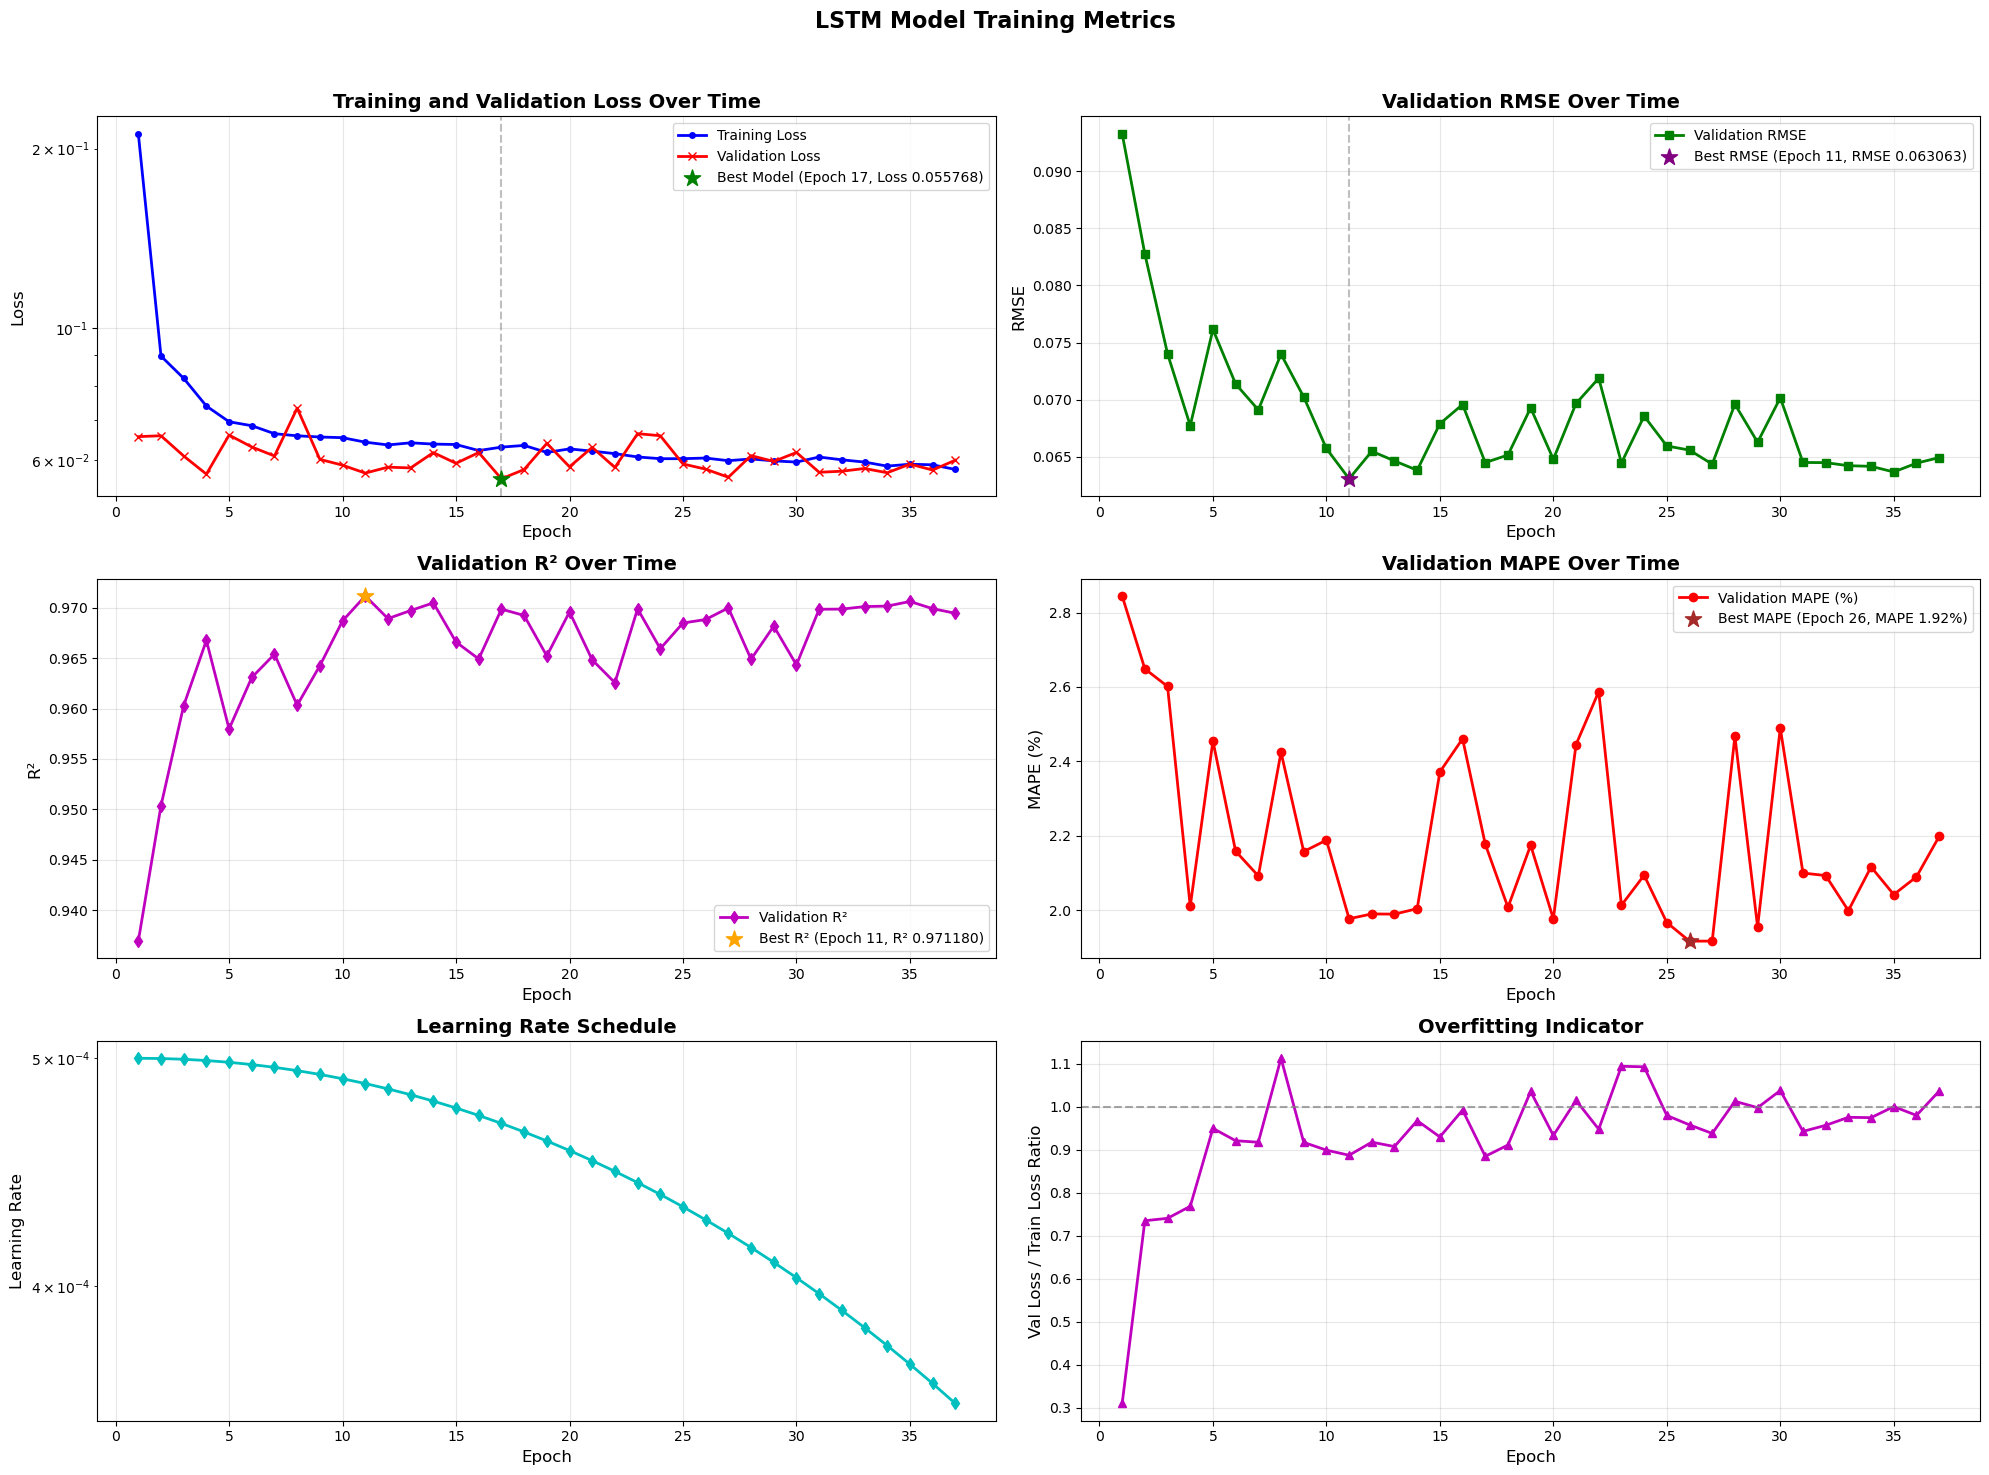

In [13]:
# Visualize training metrics
fig = model.plot_training_history()
plt.show()
model.transform_info = transform_info  # Store the whole transform_info object

In [14]:
# Evaluate on test data
predictions, actuals, metrics = model.evaluate(
        X_test, y_test,
    target_scaler=scalers["Radiation_log"],
    transform_info=transform_info,  # Pass the complete transform_info
    )
    
    
# Calculate RMSE in original scale
rmse = np.sqrt(np.mean((predictions - actuals) ** 2))
#print(f"Test RMSE (original scale): {rmse:.4f}")
    


Scaled Metrics:
Test RMSE: 0.060805
Test R²: 0.972600
Test MAPE (capped at 100%): 17.78%

Original Scale Metrics:
Test RMSE: 0.778773
Test R²: 0.965488
Test MAPE (capped at 100%): 3.33%


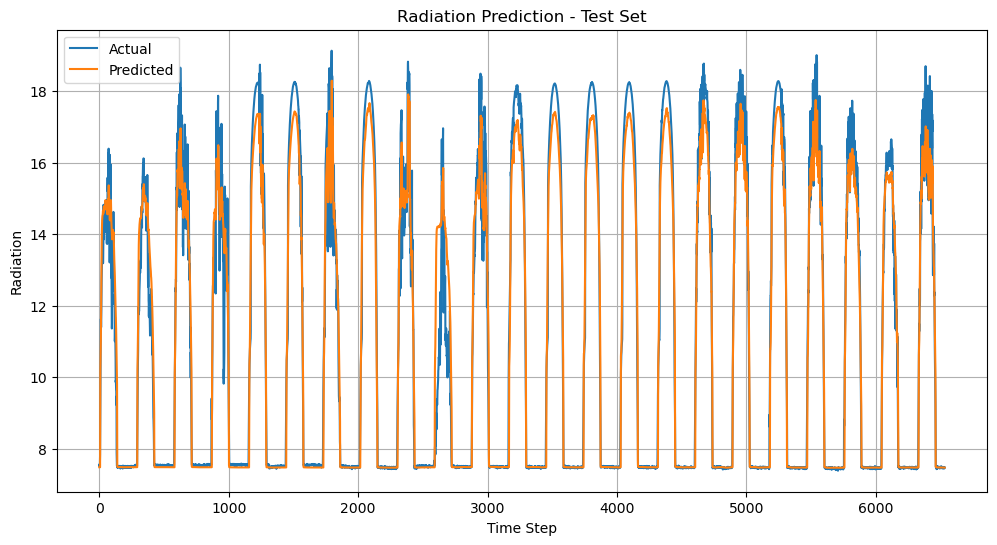

In [15]:
#plot predictions

plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Radiation Prediction - Test Set')
plt.xlabel('Time Step')
plt.ylabel('Radiation')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Evaluate on test data
predictions = model.predict_with_uncertainty(X_test, mc_samples=30,    
                                             target_scaler=scalers["Radiation_log"],
                                             transform_info=transform_info,  # Pass the complete transform_info
                                             )
actuals = y_test

model.plot_prediction_with_uncertainty(X_test, actuals, mc_samples=30,    
                                       target_scaler=scalers["Radiation_log"],
                                       transform_info=transform_info,  # Pass the complete transform_info
                                       )


AttributeError: 'WeatherLSTM' object has no attribute 'predict_with_uncertainty'

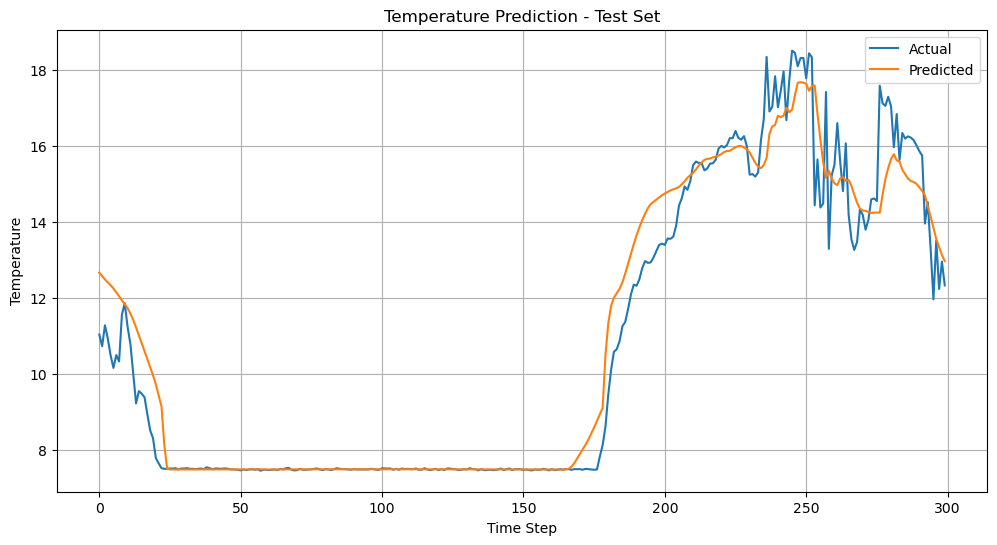

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(actuals[2700:3000], label='Actual')
plt.plot(predictions[2700:3000], label='Predicted')
plt.title('Temperature Prediction - Test Set')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

Resampling data to 1min frequency...
Original data points: 6533, After resampling: 6533
Evaluation Summary:
Number of samples (after resampling): 6533
RMSE: 0.752468
MAE: 0.409651
MAPE: 3.22%
R²: 0.967780
Correlation: 0.984094


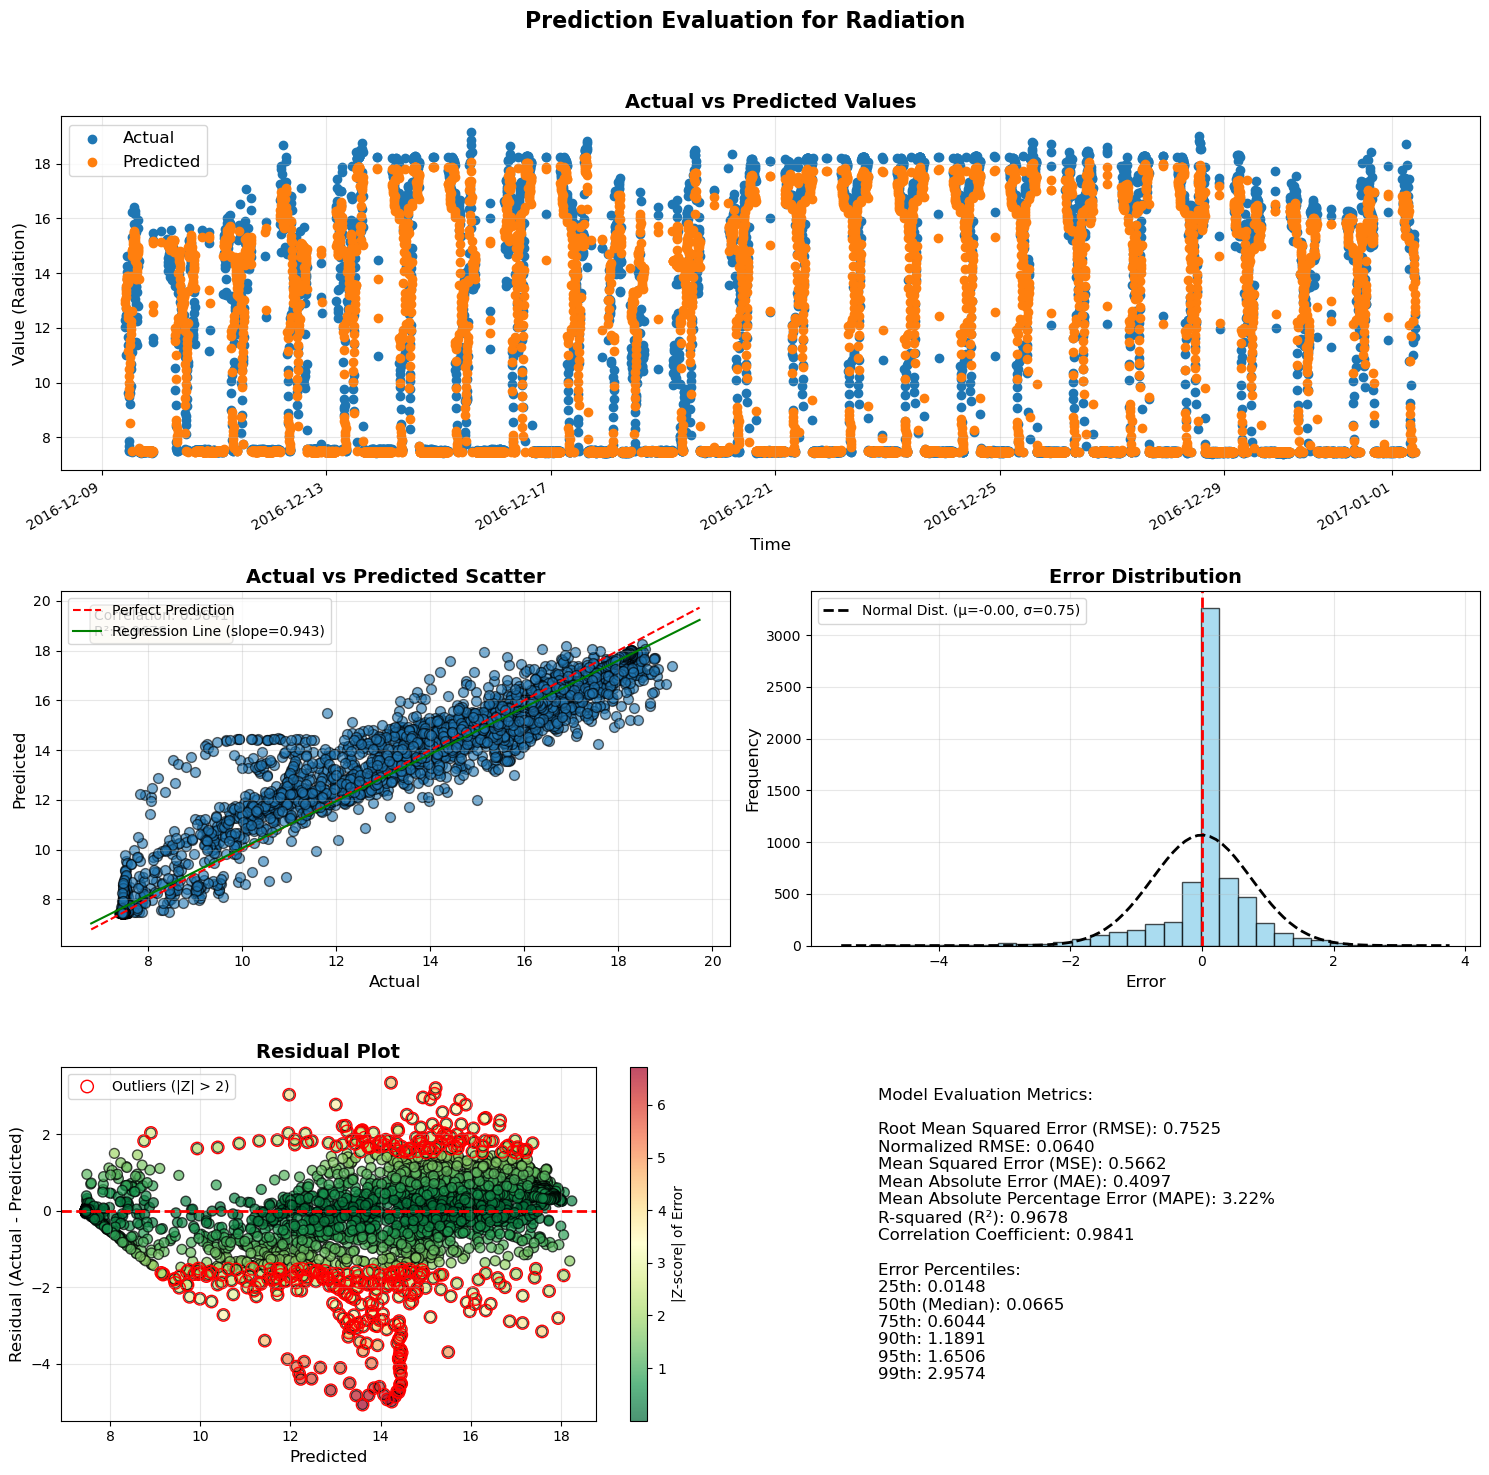

In [21]:
import plot_utils as pu 

# You can create timestamps if your data has a time component
timestamps = df['UNIXTime'].values[-len(predictions):]  # assuming UNIXTime exists in your df

# Make sure scaler is a dictionary with target_col as key
if not isinstance(scalers, dict):
    scalers_dict = {target_col: scalers}
else:
    scalers_dict = scalers

fig_eval = pu.create_evaluation_dashboard(
    predictions=predictions, 
    actuals=actuals, 
    scalers=None,  # !!! there is a bug here
    target_col=target_col,
    timestamps=timestamps
)




## Key Performance Metrics
- **RMSE: 69.7374**
- **Normalized RMSE: 0.0575** (excellent - below 0.1 indicates strong fit)
- **MAE: 33.1875**
- **MAPE: 37.98%**
- **R²: 0.9310**
- **Correlation Coefficient: 0.9656**

## Error Distribution Analysis

The error percentiles reveal a fascinating pattern:

| Percentile | Error Value |
|------------|-------------|
| 25th       | 0.0217      |
| 50th (Median) | 0.0817   |
| 75th       | 46.7872     |
| 90th       | 99.8823     |
| 95th       | 143.1077    |
| 99th       | 293.8402    |

## Insights

1. **Excellent Median Performance**: The median error of only 0.0817 indicates that at least 50% of the predictions are extremely accurate.

2. **Right-Skewed Error Distribution**: The dramatic jump between the 50th percentile (0.0817) and the 75th percentile (46.7872) reveals a highly skewed error distribution.

3. **Targeted Improvement Opportunity**: The large gap between percentiles suggests that the model is highly accurate for most cases but struggles significantly with a specific subset of observations.

4. **Performance Dichotomy**: The excellent normalized RMSE (0.0575) and R² (0.93) alongside the higher MAPE (37.98%) confirm that the model generally performs well but likely struggles with smaller radiation values where small absolute errors translate to large percentage errors.


In [14]:
model.save('weather_lstm_model.pt')

Model saved to weather_lstm_model.pt


# Weather Prediction LSTM Model: Technical Summary

## Model Architecture

**WeatherLSTM Network Structure:**<br>
┌─────────────────────────────────────────────────────┐<br>
│ ➤ LSTM Layer (16→256, layers=2, dropout=0.3)        │<br>
│ ➤ Dropout Layer (p=0.3)                             │<br>
│ ➤ Fully Connected Layer (256→128)                   │<br>
│ ➤ ReLU Activation                                   │<br>
│ ➤ Dropout Layer (p=0.3)                             │<br>
│ ➤ Fully Connected Layer (128→64)                    │<br>
│ ➤ ReLU Activation                                   │<br>
│ ➤ Dropout Layer (p=0.3)                             │<br>
│ ➤ Fully Connected Layer (64→1)                      │<br>
└─────────────────────────────────────────────────────┘

## Core Parameters
- **Input Dimension**: 16 features
- **Hidden Dimension**: 256 (increased from 64)
- **LSTM Layers**: 2
- **Output Dimension**: 1 (predicting a single value)
- **Dropout Probability**: 0.3 (applied at multiple layers)
- **Fully Connected Layers**: 256→128→64→1 with ReLU activations

## Dataset Structure
- **Training Set**: X_train shape: (19596, 24, 16), y_train shape: (19596, 1)
- **Validation Set**: X_val shape: (6533, 24, 16), y_val shape: (6533, 1)
- **Data Format**: 24 timesteps with 16 features per timestep

## Loss Function
The model uses a combined loss function:

$\mathcal{L}_{combined} = 0.7 \times \mathcal{L}_{MSE} + 0.3 \times \mathcal{L}_{MAPE}$

Where:
- $\mathcal{L}_{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_{true} - y_{pred})^2$
- $\mathcal{L}_{MAPE} = \frac{1}{n}\sum_{i=1}^{n}\left|\frac{y_{true} - y_{pred}}{|y_{true}| + \epsilon}\right| \times 100\%$
  - With $\epsilon = 1.0$ to protect against division by zero

## Regularization Techniques
- **Dropout**: Probability of 0.3 at LSTM and after each fully connected layer
- **L2 Regularization**: Weight decay of 0.0001
- **Gradient Clipping**: Norm constrained to 1.0

## Optimization Strategy
- **Learning Rate Scheduler**: CosineAnnealingLR with T_max=100
- **Patience for Early Stopping**: 15 epochs

## Data Transformation
- **Log Transformation**: Applied to Radiation values
  - $Radiation_{log} = \log(Radiation + \epsilon)$
  - Where $\epsilon$ is a small constant (1e-06) to prevent log(0)
- **Feature Engineering**: Added 'Radiation_is_low' binary feature (threshold: 1.2)

## Input Features
16 features including:
- Raw measurements: Radiation, Temperature, Pressure, Humidity, Wind Direction, Speed
- Engineered features: Radiation_is_low, SunriseMinutes, SunsetMinutes, DaylightMinutes
- Temporal features: TimeSinceSunrise, TimeUntilSunset, DaylightPosition
- Cyclical time encoding: TimeMinutesSin, TimeMinutesCos, HourOfDay

This architecture optimally balances model complexity with regularization to prevent overfitting while capturing the temporal patterns in weather data for accurate radiation prediction.